In [1]:
#第一步需要读取全部的特征值，将其命名为data


In [88]:
import os
import pandas as pd

# 指定存储CSV文件的文件夹路径
folder_path = "D:\西安22运行数据\运行 22\特征值"  # 替换为您的文件夹路径

# 获取文件夹中所有CSV文件的路径和大小信息，并按文件大小从大到小排序
files_info = []  # 存储文件路径和大小信息的列表
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)  # 获取文件路径
        file_size = os.path.getsize(file_path)  # 获取文件大小
        files_info.append((file_path, file_size))  # 将文件路径和大小信息添加到列表中
files_info.sort(key=lambda x: x[1], reverse=True)  # 根据文件大小从大到小排序

# 读取并组合CSV文件
all_data = []
for file_path, _ in files_info:
    data = pd.read_csv(file_path)  # 读取CSV文件
    all_data.append(data)  # 将数据框添加到列表中

# 将所有数据框纵向拼接起来
data = pd.concat(all_data, axis=0, ignore_index=True)
data

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
0,7.991742,8.553145,15.277778,0.464003,-0.482400,3.887273,0.293951,0.327337,1036,69,267,262,438,0.066602,0.257722,0.252896,0.422780
1,3.993994,9.432624,15.555556,0.448718,-1.527778,5.359666,0.218952,0.493007,111,65,26,10,10,0.585586,0.234234,0.090090,0.090090
2,5.744949,5.977853,11.111111,0.577778,-0.629630,3.204225,0.334904,0.452284,154,7,50,45,52,0.045455,0.324675,0.292208,0.337662
3,3.110329,4.015152,7.777778,0.620915,-0.500000,2.389362,0.378472,0.329843,71,17,17,20,17,0.239437,0.239437,0.281690,0.239437
4,1.164021,1.746032,3.611111,0.486111,-1.111111,1.307451,0.120281,0.701355,21,8,4,4,5,0.380952,0.190476,0.190476,0.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227267,7.068534,8.936385,13.333333,0.492424,-0.502137,4.132155,0.289304,0.434239,244,52,44,52,96,0.213115,0.180328,0.213115,0.393443
227268,4.181287,5.777778,10.555556,0.607639,-0.486111,3.786479,0.404555,0.221788,76,22,16,20,18,0.289474,0.210526,0.263158,0.236842
227269,9.361111,9.361111,15.555556,0.833333,-0.791667,4.457013,0.415447,0.720484,50,1,19,20,10,0.020000,0.380000,0.400000,0.200000
227270,2.335069,3.435504,7.500000,0.474910,-0.531401,2.326502,0.324813,0.305534,128,42,31,23,32,0.328125,0.242188,0.179688,0.250000


In [3]:
#主成分分析，得到主成分贡献率、累计贡献率、荷载矩阵、得分矩阵。这一步的目的是为了确定保留几个主成分

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 假设您的数据存储在名为data的DataFrame中
X = data.values  # 将数据转换为NumPy数组


# 假设X是您的数据集，每一行代表一个样本，每一列代表一个特征

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化PCA模型
pca = PCA()
pca.fit(X_scaled)

# 主成分贡献率
explained_variance_ratio = pca.explained_variance_ratio_

# 累计贡献率
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 主成分特征值
eigenvalues = pca.explained_variance_

# 主成分荷载矩阵
loadings = pca.components_
#主成分得分矩阵
scores = pca.transform(X_scaled)
# 输出结果
print("主成分贡献率:", explained_variance_ratio)
print("累计贡献率:", cumulative_explained_variance_ratio)
print("主成分特征值:", eigenvalues)
print("主成分荷载矩阵:", loadings)
print("主成分得分矩阵:", scores)

主成分贡献率: [4.09387981e-01 2.03327137e-01 1.44463002e-01 6.31453749e-02
 5.19454790e-02 4.26870302e-02 2.92433335e-02 1.60171114e-02
 1.41067649e-02 9.69933825e-03 6.90386823e-03 5.84227206e-03
 1.95998777e-03 7.43344880e-04 4.92299614e-04 3.51914269e-05
 4.83636327e-07]
累计贡献率: [0.40938798 0.61271512 0.75717812 0.8203235  0.87226897 0.914956
 0.94419934 0.96021645 0.97432321 0.98402255 0.99092642 0.99676869
 0.99872868 0.99947203 0.99996432 0.99999952 1.        ]
主成分特征值: [6.95962631e+00 3.45657653e+00 2.45588184e+00 1.07347610e+00
 8.83077028e-01 7.25682707e-01 4.97138857e-01 2.72292092e-01
 2.39816059e-01 1.64889476e-01 1.17366276e-01 9.93190620e-02
 3.33199387e-02 1.26369186e-02 8.36913026e-03 5.98256889e-04
 8.22185374e-06]
主成分荷载矩阵: [[ 3.54646920e-01  3.27519081e-01  3.41939944e-01  7.74767594e-02
  -5.01794435e-02  2.88376515e-01  1.56175738e-01  1.54892516e-01
   2.55053378e-01 -9.36536269e-02  2.94263412e-01  2.87037413e-01
   2.44699024e-01 -2.68631131e-01  2.48931361e-01  2.158643

In [7]:
scores

array([[ 5.51674803,  6.153147  ,  0.8033642 ,  2.12563888],
       [-0.49417233, -1.22013427,  3.06383061, -2.24390752],
       [ 0.75284299, -0.06964567, -1.38177028, -0.14403153],
       ...,
       [ 1.97891448, -2.71163226, -0.64996495, -0.17957122],
       [-1.52774816,  0.79827219, -0.59397404,  0.11519654],
       [-2.12127068,  0.53818821,  1.33184069, -0.64758699]])

In [8]:
type(scores)

numpy.ndarray

In [9]:
scores = pd.DataFrame(scores)

# 保存dataframe到CSV文件
scores.to_csv('scores.csv', index=False)

In [12]:
eigenvalues
np.set_printoptions(suppress=True)
eigenvalues

array([6.95962631, 3.45657653, 2.45588184, 1.0734761 , 0.88307703,
       0.72568271, 0.49713886, 0.27229209, 0.23981606, 0.16488948,
       0.11736628, 0.09931906, 0.03331994, 0.01263692, 0.00836913,
       0.00059826, 0.00000822])

In [11]:
cumulative_explained_variance_ratio
np.set_printoptions(suppress=True)
cumulative_explained_variance_ratio

array([0.40938798, 0.61271512, 0.75717812, 0.8203235 , 0.87226897,
       0.914956  , 0.94419934, 0.96021645, 0.97432321, 0.98402255,
       0.99092642, 0.99676869, 0.99872868, 0.99947203, 0.99996432,
       0.99999952, 1.        ])

In [10]:
cumulative_explained_variance_ratio
np.set_printoptions(suppress=True)
cumulative_explained_variance_ratio

array([0.40938798, 0.20332714, 0.144463  , 0.06314537, 0.05194548,
       0.04268703, 0.02924333, 0.01601711, 0.01410676, 0.00969934,
       0.00690387, 0.00584227, 0.00195999, 0.00074334, 0.0004923 ,
       0.00003519, 0.00000048])

In [5]:
#由上一步的代码可得到：前4个主成分的特征值都大于1，并且累计贡献率达到80%以上，选取前4个主成分，降维。

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 假设您的数据存储在名为data的DataFrame中
X = data.values  # 将数据转换为NumPy数组


# 假设X是您的数据集，每一行代表一个样本，每一列代表一个特征

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化PCA模型
pca = PCA(n_components=4)
pca.fit(X_scaled)

# 主成分贡献率
explained_variance_ratio = pca.explained_variance_ratio_

# 累计贡献率
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 主成分特征值
eigenvalues = pca.explained_variance_

# 主成分荷载矩阵
loadings = pca.components_
#主成分得分矩阵
scores = pca.transform(X_scaled)
# 输出结果
print("主成分贡献率:", explained_variance_ratio)
print("累计贡献率:", cumulative_explained_variance_ratio)
print("主成分特征值:", eigenvalues)
print("主成分荷载矩阵:", loadings)
print("主成分得分矩阵:", scores)

主成分贡献率: [0.40938798 0.20332714 0.144463   0.06314537]
累计贡献率: [0.40938798 0.61271512 0.75717812 0.8203235 ]
主成分特征值: [6.95962631 3.45657653 2.45588184 1.0734761 ]
主成分荷载矩阵: [[ 0.35464692  0.32751908  0.34193994  0.07747676 -0.05017944  0.28837652
   0.15617574  0.15489252  0.25505338 -0.09365363  0.29426341  0.28703741
   0.24469902 -0.26863113  0.24893136  0.21586437  0.1629739 ]
 [-0.00820133 -0.03967221 -0.05869114 -0.36063554  0.33153819 -0.15760897
  -0.34057504 -0.31420526  0.34242584  0.14442521  0.27312787  0.27697883
   0.333713    0.07993149 -0.20505447 -0.19551822  0.16710301]
 [-0.01115231  0.19576965  0.17554045  0.11983372 -0.27965329  0.22865294
   0.07661106  0.22508272  0.17561594  0.45267908  0.06843306  0.06487079
   0.05660742  0.41535911 -0.29029024 -0.34457797 -0.32553813]
 [-0.19350091 -0.2231419  -0.14114484  0.52006506  0.17704635 -0.21083039
   0.41199612 -0.21459064  0.18983624  0.04260412  0.19197319  0.2676147
   0.10056718  0.05257394 -0.08942501  0.30437927 

In [7]:
#使用主成分的得分矩阵进行聚类，不过首先使用DB指标确定最佳的聚类数目

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

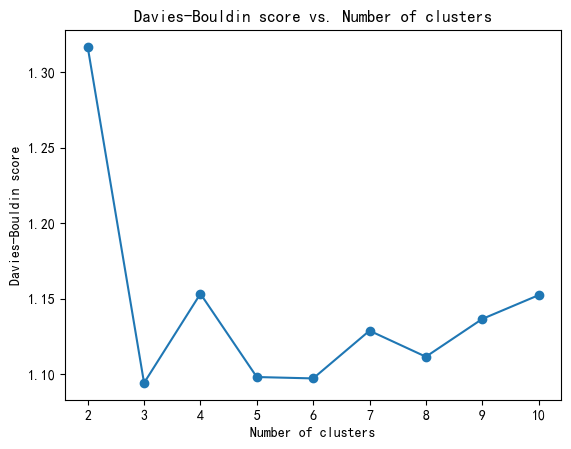

In [41]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
scores = pd.DataFrame(scores)
X = scores.values 
# 加载数据集，假设数据集已经被加载到变量 X 中

# 设置尝试的簇数范围
k_values = range(2, 11)  # 尝试从2到10个簇

# 计算不同簇数下的 DB 指标
db_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = davies_bouldin_score(X, labels)
    db_scores.append(score)

# 绘制簇数与 DB 指标的关系图
plt.plot(k_values, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin score vs. Number of clusters')
plt.savefig('Davies-Bouldin score vs. Number of clusters.png')

plt.show()

In [9]:
#根据上面的DB指标可以知道聚为3类是最佳的，接下来聚类

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

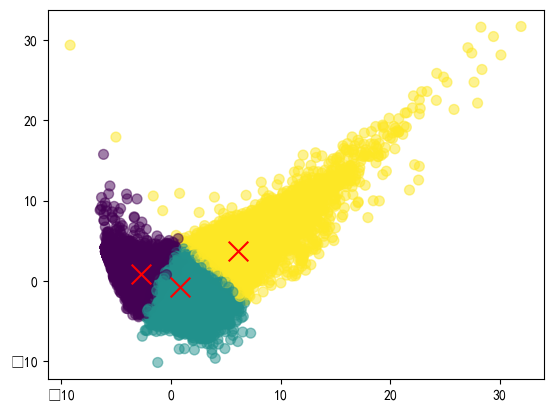

array([2, 1, 1, ..., 1, 0, 0])

In [43]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = scores.values  # 如果使用 Pandas DataFrame 对象（data），则可以直接调用 values 属性获取 NumPy 数组
# 生成或加载你的数据集，存储在变量 X 中

# 设置随机种子为100
np.random.seed(100)

# 使用全局 k-means 聚类方法对数据进行聚类
def global_kmeans(X, n_clusters, n_attempts):
    best_score = np.infty
    best_kmeans = None
    for _ in range(n_attempts):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        score = kmeans.inertia_
        if score < best_score:
            best_score = score
            best_kmeans = kmeans
    return best_kmeans

# 调用全局 k-means 聚类方法
kmeans = global_kmeans(X, n_clusters=3, n_attempts=100)

# 获取聚类标签
labels = kmeans.labels_

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x')

plt.savefig('聚类结果.png')
plt.show()
labels

In [117]:
labels[:20]

array([2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0])

In [44]:
# cluster_indices包含了每个类别的行索引
df=data.copy()
X = pd.DataFrame(df)
X['cluster_label'] = labels
# 获取每个类别的行索引
cluster_indices = {}
for label in range(3):
    cluster_indices[label] = X[X['cluster_label'] == label].index.tolist()
cluster_indices


{0: [4,
  7,
  14,
  19,
  20,
  21,
  22,
  24,
  25,
  29,
  30,
  38,
  39,
  43,
  59,
  60,
  68,
  69,
  71,
  73,
  74,
  76,
  77,
  80,
  87,
  89,
  91,
  100,
  102,
  103,
  104,
  105,
  107,
  115,
  117,
  121,
  122,
  126,
  128,
  130,
  131,
  132,
  134,
  154,
  155,
  160,
  172,
  196,
  209,
  210,
  212,
  213,
  214,
  256,
  257,
  258,
  259,
  264,
  265,
  267,
  270,
  272,
  274,
  277,
  278,
  279,
  282,
  289,
  290,
  293,
  299,
  300,
  301,
  307,
  308,
  310,
  314,
  318,
  321,
  322,
  323,
  324,
  326,
  327,
  341,
  343,
  347,
  348,
  352,
  354,
  369,
  375,
  376,
  378,
  380,
  387,
  392,
  394,
  395,
  404,
  405,
  406,
  408,
  409,
  410,
  430,
  439,
  443,
  444,
  447,
  448,
  464,
  470,
  471,
  476,
  479,
  483,
  488,
  489,
  494,
  499,
  501,
  504,
  506,
  512,
  516,
  520,
  521,
  525,
  526,
  529,
  536,
  537,
  545,
  547,
  549,
  553,
  555,
  559,
  560,
  561,
  562,
  566,
  568,
  572,
  591,
  59

In [14]:
cluster_indices[0]

[4,
 7,
 14,
 19,
 20,
 21,
 22,
 24,
 25,
 29,
 30,
 38,
 39,
 43,
 59,
 60,
 68,
 69,
 71,
 73,
 74,
 76,
 77,
 80,
 87,
 89,
 91,
 100,
 102,
 103,
 104,
 105,
 107,
 115,
 117,
 121,
 122,
 126,
 128,
 130,
 131,
 132,
 134,
 154,
 155,
 160,
 172,
 196,
 209,
 210,
 212,
 213,
 214,
 256,
 257,
 258,
 259,
 264,
 265,
 267,
 270,
 272,
 274,
 277,
 278,
 279,
 282,
 289,
 290,
 293,
 299,
 300,
 301,
 307,
 308,
 310,
 314,
 318,
 321,
 322,
 323,
 324,
 326,
 327,
 341,
 343,
 347,
 348,
 352,
 354,
 369,
 375,
 376,
 378,
 380,
 387,
 392,
 394,
 395,
 404,
 405,
 406,
 408,
 409,
 410,
 430,
 439,
 443,
 444,
 447,
 448,
 464,
 470,
 471,
 476,
 479,
 483,
 488,
 489,
 494,
 499,
 501,
 504,
 506,
 512,
 516,
 520,
 521,
 525,
 526,
 529,
 536,
 537,
 545,
 547,
 549,
 553,
 555,
 559,
 560,
 561,
 562,
 566,
 568,
 572,
 591,
 592,
 593,
 598,
 602,
 628,
 631,
 633,
 634,
 639,
 641,
 642,
 644,
 652,
 655,
 656,
 667,
 677,
 682,
 683,
 687,
 688,
 689,
 702,
 707,
 709,
 71

In [17]:
len(cluster_indices[0])

73879

In [18]:
len(cluster_indices[1])

140689

In [19]:
len(cluster_indices[2])

12704

In [15]:
cluster_indices[1]

[1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 23,
 26,
 27,
 28,
 32,
 33,
 34,
 35,
 36,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 70,
 72,
 75,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 90,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 118,
 119,
 120,
 123,
 124,
 125,
 127,
 129,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 211,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 239,
 

In [16]:
cluster_indices[2]

[0,
 18,
 31,
 37,
 93,
 148,
 204,
 238,
 248,
 253,
 261,
 286,
 287,
 297,
 298,
 304,
 320,
 377,
 393,
 432,
 465,
 503,
 510,
 535,
 538,
 551,
 600,
 613,
 623,
 625,
 654,
 659,
 706,
 713,
 714,
 942,
 998,
 1040,
 1140,
 1161,
 1173,
 1290,
 1294,
 1318,
 1342,
 1372,
 1378,
 1392,
 1399,
 1506,
 1511,
 1514,
 1583,
 1594,
 1675,
 1729,
 1768,
 1818,
 1826,
 1827,
 1834,
 1839,
 1843,
 1844,
 1862,
 1964,
 1995,
 1997,
 2004,
 2057,
 2199,
 2201,
 2207,
 2216,
 2219,
 2232,
 2258,
 2293,
 2300,
 2310,
 2314,
 2323,
 2336,
 2343,
 2347,
 2359,
 2438,
 2457,
 2469,
 2499,
 2500,
 2505,
 2530,
 2532,
 2539,
 2540,
 2591,
 2653,
 2789,
 2848,
 2871,
 2925,
 2937,
 2940,
 2947,
 2971,
 2991,
 2996,
 3024,
 3045,
 3088,
 3094,
 3097,
 3251,
 3264,
 3270,
 3275,
 3414,
 3619,
 3632,
 3704,
 3712,
 3713,
 3737,
 3771,
 3794,
 3804,
 3810,
 3926,
 3961,
 3964,
 3989,
 3994,
 4006,
 4064,
 4110,
 4116,
 4122,
 4137,
 4149,
 4152,
 4154,
 4159,
 4226,
 4338,
 4342,
 4345,
 4353,
 4358,


In [13]:
#将每个类的行标签匹配到data，这样就可以得到按类分的特征值

In [45]:
#indexed_data0 为0类的特征值，mean_values0 为0类的特征值的每列的平均值
df0 = pd.DataFrame(list(cluster_indices.values())[0], columns=['0'])

indexed_data0 = data.loc[df0.iloc[:, 0]]
# 计算每列的平均值
mean_values0 = indexed_data0.mean()
mean_values0=pd.DataFrame(mean_values0)

#indexed_data1 为1类的特征值，mean_values1 为1类的特征值的每列的平均值
df1 = pd.DataFrame(list(cluster_indices.values())[1], columns=['1'])
df1
indexed_data1 = data.loc[df1.iloc[:, 0]]

# 计算每列的平均值
mean_values1 = indexed_data1.mean()
mean_values1=pd.DataFrame(mean_values1,columns=['1'])

#indexed_data2 为2类的特征值，mean_values2 为2类的特征值的每列的平均值
df2 = pd.DataFrame(list(cluster_indices.values())[2], columns=['2'])
df2
indexed_data2 = data.loc[df2.iloc[:, 0]]

# 计算每列的平均值
mean_values2 = indexed_data2.mean()
mean_values2=pd.DataFrame(mean_values2,columns=['2'])
mean_values0

,0
v_average,1.659196
v_average_travel,3.534419
v_max,5.840594
plus_average,0.514415
slow_average,-0.587117
v_std,1.872196
plus_std,0.225309
slow_std,0.293900
time,94.066974
time_i,55.114904


In [21]:
indexed_data0

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
4,1.164021,1.746032,3.611111,0.486111,-1.111111,1.307451,0.120281,0.701355,21,8,4,4,5,0.380952,0.190476,0.190476,0.238095
7,2.960705,8.468992,11.944444,0.574074,-0.873016,4.509159,0.372218,0.641705,123,81,15,14,13,0.658537,0.121951,0.113821,0.105691
14,3.850676,6.616162,12.222222,0.531746,-0.604354,4.051083,0.288457,0.424987,189,80,35,37,37,0.423280,0.185185,0.195767,0.195767
19,1.536458,1.820988,3.611111,0.555556,-0.520833,1.104547,0.296957,0.257507,32,6,7,8,11,0.187500,0.218750,0.250000,0.343750
20,1.220238,1.314103,3.055556,0.555556,-0.486111,0.873185,0.424313,0.268957,28,3,6,8,11,0.107143,0.214286,0.285714,0.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227263,3.567859,6.652330,11.944444,0.520833,-0.703704,3.847822,0.289021,0.612372,289,135,56,45,53,0.467128,0.193772,0.155709,0.183391
227264,2.438889,2.438889,3.888889,0.470085,-0.334967,1.020303,0.149573,0.095975,50,1,13,17,19,0.020000,0.260000,0.340000,0.380000
227266,2.305556,3.458333,4.722222,0.601852,-0.500000,1.964382,0.285390,0.272166,30,11,6,5,8,0.366667,0.200000,0.166667,0.266667
227270,2.335069,3.435504,7.500000,0.474910,-0.531401,2.326502,0.324813,0.305534,128,42,31,23,32,0.328125,0.242188,0.179688,0.250000


In [46]:
#各类别的平均特征值transposed_df
average_feature= pd.concat([mean_values0,mean_values1,mean_values2], axis=1)
transposed_df = average_feature.transpose()
transposed_df

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
0,1.659196,3.534419,5.840594,0.514415,-0.587117,1.872196,0.225309,0.293900,94.066974,55.114904,11.650726,13.275139,14.003749,0.539789,0.139104,0.158461,0.162404
1,6.535373,7.967615,13.236627,0.646689,-0.712324,4.205465,0.380657,0.484631,133.502840,23.322790,39.356695,37.517837,33.257874,0.183536,0.301317,0.288575,0.226257
2,12.880366,13.499837,21.908126,0.508819,-0.555373,5.346288,0.308961,0.409792,757.282273,34.135076,225.970718,212.341940,284.745986,0.048794,0.302576,0.283819,0.364671


In [20]:
transposed_df.to_csv('average_feature', index=False)

In [22]:
average_feature.to_excel('average_feature.xlsx')

In [19]:
average_feature

,0,1,2
v_average,1.659196,6.535373,12.880366
v_average_travel,3.534419,7.967615,13.499837
v_max,5.840594,13.236627,21.908126
plus_average,0.514415,0.646689,0.508819
slow_average,-0.587117,-0.712324,-0.555373
v_std,1.872196,4.205465,5.346288
plus_std,0.225309,0.380657,0.308961
slow_std,0.293900,0.484631,0.409792
time,94.066974,133.502840,757.282273
time_i,55.114904,23.322790,34.135076


In [47]:
#在每个聚类中选取与该类特征值相关系数最大的代表性运动学片段构建车辆的行驶工况。
sum_of_eighth_column0 = indexed_data0.iloc[:, 8].sum()
sum_of_eighth_column_z = data.iloc[:, 8].sum()
w0=1800*(sum_of_eighth_column0)/(94.066974*sum_of_eighth_column_z)
sum_of_eighth_column1 = indexed_data1.iloc[:, 8].sum()
w1=1800*(sum_of_eighth_column1)/(133.502840*sum_of_eighth_column_z)
sum_of_eighth_column2 = indexed_data2.iloc[:, 8].sum()
w2=1800*(sum_of_eighth_column2)/(757.282273*sum_of_eighth_column_z)
print("w0:", w0)
print("w1:", w1)
print("w2:", w2)


w0: 3.7616099891918355
w1: 7.1632959846372515
w2: 0.6468345961650179


In [48]:
#在indexed_data0找出三行数据，这三行数据与transposed_df的第一行数据相关系数最大
# 计算相关系数
corr_values = indexed_data0.corrwith(transposed_df.iloc[0], axis=1)

# 找到相关系数绝对值最大的三个行索引
top_three_indices = np.abs(corr_values).nlargest(4).index

# 输出结果
top_three_rows0 = indexed_data0.loc[top_three_indices]
top_three_rows0

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
37152,2.254566,5.309140,8.611111,0.497076,-0.701058,3.034470,0.286117,0.396274,146,85,19,21,21,0.582192,0.130137,0.143836,0.143836
107764,3.196673,7.663818,11.388889,0.648148,-0.822222,4.324966,0.334649,0.529850,187,110,24,25,28,0.588235,0.128342,0.133690,0.149733
192927,2.211372,5.146465,7.777778,0.399306,-0.570988,2.843282,0.195650,0.474145,128,74,16,18,20,0.578125,0.125000,0.140625,0.156250
170482,1.101533,2.590090,4.722222,0.505051,-0.462963,1.460448,0.285700,0.173225,87,51,11,12,13,0.586207,0.126437,0.137931,0.149425


In [49]:
# 计算相关系数
corr_values = indexed_data1.corrwith(transposed_df.iloc[1], axis=1)

# 找到相关系数绝对值最大的5个行索引
top_three_indices = np.abs(corr_values).nlargest(7).index

# 输出结果
top_three_rows1 = indexed_data1.loc[top_three_indices]
top_three_rows1

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
15868,5.538348,6.657801,11.111111,0.732323,-0.746528,3.713800,0.462886,0.429139,113,20,33,32,28,0.176991,0.292035,0.283186,0.247788
160684,5.591787,6.698495,11.111111,0.531046,-0.572917,3.816884,0.350832,0.373567,115,20,34,32,29,0.173913,0.295652,0.278261,0.252174
191897,6.175556,7.351852,12.500000,0.487988,-0.555556,4.125670,0.330288,0.330344,125,21,37,35,32,0.168000,0.296000,0.280000,0.256000
19491,4.039039,4.820789,7.777778,0.580808,-0.502646,2.720578,0.256906,0.316356,74,13,22,21,18,0.175676,0.297297,0.283784,0.243243
71166,7.126502,8.574977,14.444444,0.586420,-0.650407,4.536710,0.415006,0.640109,148,26,45,41,36,0.175676,0.304054,0.277027,0.243243
212600,10.661247,12.856209,18.888889,0.743728,-0.772417,6.194562,0.420455,0.604013,205,36,62,57,50,0.175610,0.302439,0.278049,0.243902
117178,6.393130,7.683486,12.500000,0.604167,-0.594136,4.244049,0.393512,0.592530,131,23,40,36,32,0.175573,0.305344,0.274809,0.244275


In [50]:
# 计算相关系数
corr_values = indexed_data2.corrwith(transposed_df.iloc[2], axis=1)

# 找到相关系数绝对值最大的1个行索引
top_three_indices = np.abs(corr_values).nlargest(1).index

# 输出结果
top_three_rows2 = indexed_data2.loc[top_three_indices]
top_three_rows2

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
76595,8.650794,9.070558,14.722222,0.509893,-0.533885,3.412341,0.344878,0.370352,497,24,146,141,186,0.04829,0.293763,0.283702,0.374245


In [51]:
top_three_rows_z= top_three_rows0.iloc[:, 8].sum()+ top_three_rows1.iloc[:, 8].sum()+ top_three_rows2.iloc[:, 8].sum()
top_three_rows_z

1956

In [ ]:
#找出运动学片段中行索引为下面的片段，把运动学片段组合起来成一个大的，行索引为下面的那个片段就是
37152   BK16UNR6的2011个运动学片段  从1开始#
107764   AK11UUK1-2 的1796
192927   374U48AK的1071
170482    384VJ44B-1的790个                    哪个文件的哪一行之前加起来为170482  
15868   29FXKYRY-2的403个运动学片段
160684   33P6G77Y-2的43
191897   374U48AK的41
19491   29FXKYRY-2的4026个运动学片段
71166    29FXKYRY-32的2588个运动学片段
212600    33AXKYR6的938
117178    383WPB4E-1的1264个
76595   AK11UUK1-1的2490

In [87]:
import os
import pandas as pd

# 指定存储CSV文件的文件夹路径
folder_path = "D:\西安22运行数据\运行 22\特征值\新建文件夹" # 替换为您的文件夹路径

# 获取文件夹中所有CSV文件的路径和大小信息，并按文件大小从大到小排序
files_info = []  # 存储文件路径和大小信息的列表
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)  # 获取文件路径
        file_size = os.path.getsize(file_path)  # 获取文件大小
        files_info.append((file_path, file_size))  # 将文件路径和大小信息添加到列表中
files_info.sort(key=lambda x: x[1], reverse=True)  # 根据文件大小从大到小排序

# 读取并组合CSV文件
all_data = []
for file_path, _ in files_info:
    data = pd.read_csv(file_path)  # 读取CSV文件
    all_data.append(data)  # 将数据框添加到列表中

# 将所有数据框纵向拼接起来
data = pd.concat(all_data, axis=0, ignore_index=True)
len(data)

212939

In [64]:
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\特征值\C001951294036.csv")
data = pd.DataFrame(excel)
len(data)

182

In [92]:
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\383WPB4E-1.csv")
df82 = pd.DataFrame(excel)
df82=df82[247596:247727]
len(df82)

131

In [115]:
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\BK16UNR6.csv")
df1 = pd.DataFrame(excel)
df1=df1[390414:390560]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\AK11UUK1-2.csv")
df2 = pd.DataFrame(excel)
df2=df2[395905:396092]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\374U48AK.csv")
df3 = pd.DataFrame(excel)
df3=df3[178989:179117]

excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\384VJ44B-1.csv")
df31 = pd.DataFrame(excel)
df31=df31[149512:149599]



excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\29FXKYRY-2.csv")
df4 = pd.DataFrame(excel)
df4=df4[57148:57261]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\33P6G77Y-2.csv")
df5 = pd.DataFrame(excel)
df5=df5[7732:7847]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\374U48AK.csv")
df6 = pd.DataFrame(excel)
df6=df6[5457:5582]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\29FXKYRY-2.csv")
df7 = pd.DataFrame(excel)
df7=df7[614967:615041]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\29FXKYRY-32.csv")
df8 = pd.DataFrame(excel)
df8=df8[400231:400379]

excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\33AXKYR6.csv")
df81 = pd.DataFrame(excel)
df81=df81[223789:223994]
excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\383WPB4E-1.csv")
df82 = pd.DataFrame(excel)
df82=df82[247596:247727]


excel=pd.read_csv(r"D:\西安22运行数据\运行 22\预处理\AK11UUK1-1.csv")
df9 = pd.DataFrame(excel)
df9=df9[552737:553234]
df_z= pd.concat([df1, df2, df3,df31,df4, df5, df6, df7, df8,df81,df82, df9], axis=0, ignore_index=True)
df_z['new_col'] = range(1, len(df_z) + 1)
df_z

,行程id,子行程id,车辆id,检测时间,经度,纬度,方向,星数,定位状态,gps速度,...,时间戳,里程戳,油量戳,车速,转数,水温,电压,加速度(m/s^2),怠速状态,new_col
0,600050992309,3757,636d9ce3-d6c1-4bcc-984a-20b82a23c538,2022-07-18 20:17:09,108.986576,34.323552,77,5,1,10,...,64.0,184,331,0.000000,727,75,14.8,-0.694444,T,1
1,600050992309,3757,636d9ce3-d6c1-4bcc-984a-20b82a23c538,2022-07-18 20:17:09,108.986576,34.323552,77,5,1,10,...,65.0,184,331,0.000000,727,75,14.8,-0.694444,T,2
2,600050992309,3757,636d9ce3-d6c1-4bcc-984a-20b82a23c538,2022-07-18 20:17:09,108.986584,34.323532,0,5,1,2,...,66.0,184,337,0.000000,735,75,14.8,-0.277778,T,3
3,600050992309,3757,636d9ce3-d6c1-4bcc-984a-20b82a23c538,2022-07-18 20:17:09,108.986584,34.323520,0,5,1,1,...,67.0,184,343,0.000000,744,76,14.9,0.000000,T,4
4,600050992309,3757,636d9ce3-d6c1-4bcc-984a-20b82a23c538,2022-07-18 20:17:09,108.986584,34.323504,0,5,1,1,...,68.0,184,350,0.000000,734,76,14.9,0.000000,T,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,600054609627,2578,5d6c2d3e-6007-4132-8c7a-fd02e58fb004,2022-09-01 20:31:37,108.938184,34.359876,85,5,1,17,...,1221.0,7627,6422,4.444444,1225,90,13.4,0.000000,F,1952
1952,600054609627,2578,5d6c2d3e-6007-4132-8c7a-fd02e58fb004,2022-09-01 20:31:37,108.938184,34.359876,85,5,1,17,...,1222.0,7627,6422,4.444444,1225,90,13.4,0.000000,F,1953
1953,600054609627,2578,5d6c2d3e-6007-4132-8c7a-fd02e58fb004,2022-09-01 20:31:37,108.938320,34.359904,85,6,1,16,...,1223.0,7633,6425,4.444444,1250,90,13.3,-0.833333,F,1954
1954,600054609627,2578,5d6c2d3e-6007-4132-8c7a-fd02e58fb004,2022-09-01 20:31:37,108.938360,34.359912,85,7,1,15,...,1224.0,7639,6429,3.611111,1048,90,13.3,-0.555556,F,1955


In [94]:
len(df_z)

1956

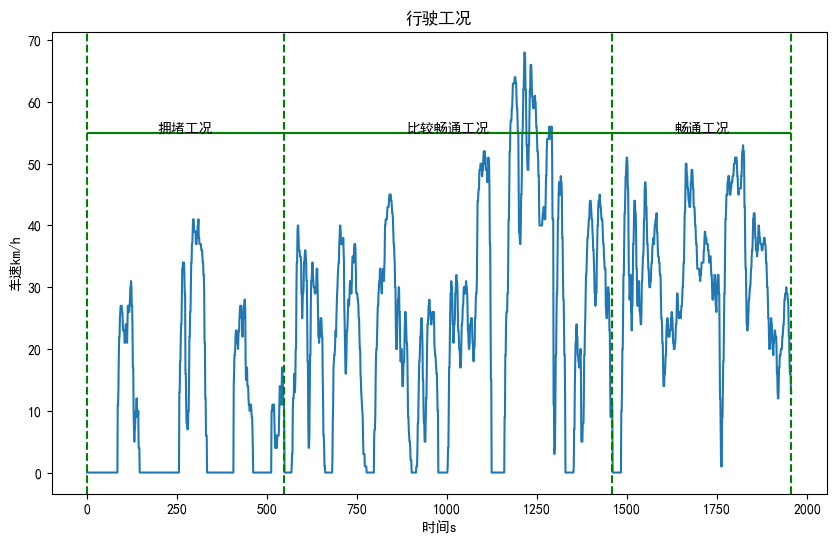

In [95]:

# 将车速单位由m/s改为km/h
df_z['车速'] = df_z['车速'] * 3.6  # 将m/s转换为km/h

# 创建画布
fig, ax = plt.subplots(figsize=(10, 6))  # 设置画布大小

# 绘制折线图
ax.plot(df_z['new_col'], df_z['车速'])
plt.axvline(x=0, color='g', linestyle='--', label='x=0')
plt.axvline(x=548, color='g', linestyle='--', label='x=548')
plt.axvline(x=1459, color='g', linestyle='--', label='x=1459')
#plt.axvline(x=1200, color='g', linestyle='--', label='x=1200')
plt.axvline(x=1956, color='g', linestyle='--', label='x=1956')

# 指定区间
start_x = 0  # 区间起始点 x 坐标
end_x = 548    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。0类工况的速度比较低而且怠速所占比例大，所以为拥堵工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '拥堵工况', ha='center')

# 指定区间
start_x =548  # 区间起始点 x 坐标
end_x = 1459    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。1类工况的速度较大而且怠速所占比例小，所以为比较畅通工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '比较畅通工况', ha='center')

# 指定区间
start_x = 1459  # 区间起始点 x 坐标
end_x = 1956   # 区间结束点 x 坐标
#end_x = 1200    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。2类工况的速度最大而且运动时间长怠速比例很小，匀速比例最大，所以为畅通工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '畅通工况', ha='center')


# 设置标题和标签
plt.rcParams['font.sans-serif'] = ['SimHei'] #正确显示文字
ax.set_title('行驶工况')
ax.set_xlabel('时间s', fontsize=16)  # 设置横坐标单位为s
ax.set_ylabel('车速km/h')  # 设置纵坐标单位为km/h

#plt.savefig('西安市行驶工况.png')

# 显示图形
plt.show()


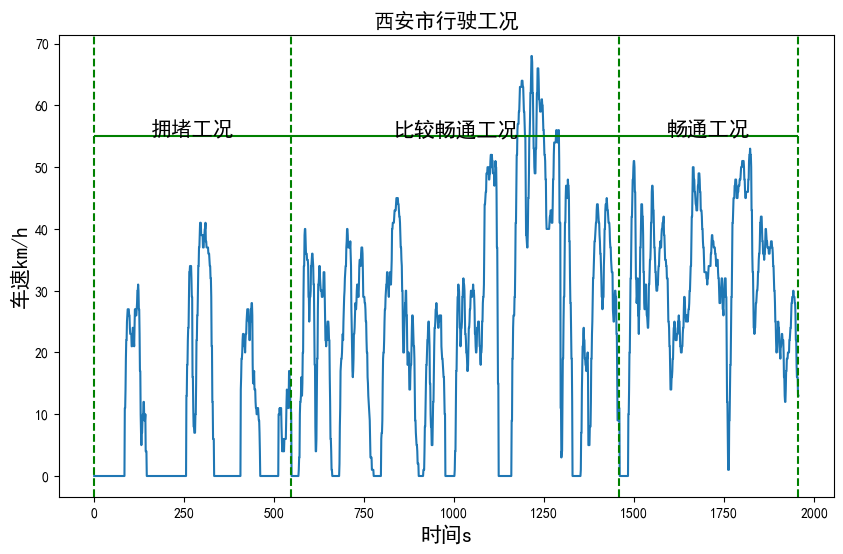

In [116]:

# 将车速单位由m/s改为km/h
df_z['车速'] = df_z['车速'] * 3.6  # 将m/s转换为km/h

# 创建画布
fig, ax = plt.subplots(figsize=(10, 6))  # 设置画布大小

# 绘制折线图
ax.plot(df_z['new_col'], df_z['车速'])
plt.axvline(x=0, color='g', linestyle='--', label='x=0')
plt.axvline(x=548, color='g', linestyle='--', label='x=548')
plt.axvline(x=1459, color='g', linestyle='--', label='x=1459')
#plt.axvline(x=1200, color='g', linestyle='--', label='x=1200')
plt.axvline(x=1956, color='g', linestyle='--', label='x=1956')

# 指定区间
start_x = 0  # 区间起始点 x 坐标
end_x = 548    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。0类工况的速度比较低而且怠速所占比例大，所以为拥堵工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '拥堵工况', ha='center', fontsize=15)

# 指定区间
start_x =548  # 区间起始点 x 坐标
end_x = 1459    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。1类工况的速度较大而且怠速所占比例小，所以为比较畅通工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '比较畅通工况', ha='center', fontsize=15)

# 指定区间
start_x = 1459  # 区间起始点 x 坐标
end_x = 1956   # 区间结束点 x 坐标
#end_x = 1200    # 区间结束点 x 坐标
y_value = 55  # 横线的 y 值

# 在区间上添加横线
plt.hlines(y_value, start_x, end_x, colors='g')

# 添加汉字。2类工况的速度最大而且运动时间长怠速比例很小，匀速比例最大，所以为畅通工况
plt.text((start_x + end_x) / 2, y_value + 0.1, '畅通工况', ha='center', fontsize=15)


# 设置标题和标签
plt.rcParams['font.sans-serif'] = ['SimHei'] #正确显示文字
ax.set_title('西安市行驶工况', fontsize=15)
ax.set_xlabel('时间s', fontsize=15)  # 设置横坐标单位为s
ax.set_ylabel('车速km/h', fontsize=15)  # 设置纵坐标单位为km/h

plt.savefig('西安市行驶工况.png')

# 显示图形
plt.show()


In [52]:
average_feature

,0,1,2
v_average,1.659196,6.535373,12.880366
v_average_travel,3.534419,7.967615,13.499837
v_max,5.840594,13.236627,21.908126
plus_average,0.514415,0.646689,0.508819
slow_average,-0.587117,-0.712324,-0.555373
v_std,1.872196,4.205465,5.346288
plus_std,0.225309,0.380657,0.308961
slow_std,0.293900,0.484631,0.409792
time,94.066974,133.502840,757.282273
time_i,55.114904,23.322790,34.135076


In [102]:
top_three_rows_z= pd.concat([top_three_rows0, top_three_rows1,top_three_rows2], axis=0, ignore_index=True)

top_three_rows_z

,v_average,v_average_travel,v_max,plus_average,slow_average,v_std,plus_std,slow_std,time,time_i,time_p,time_s,time_u,ratio_i,ratio_p,ratio_s,ratio_u
0,2.254566,5.309140,8.611111,0.497076,-0.701058,3.034470,0.286117,0.396274,146,85,19,21,21,0.582192,0.130137,0.143836,0.143836
1,3.196673,7.663818,11.388889,0.648148,-0.822222,4.324966,0.334649,0.529850,187,110,24,25,28,0.588235,0.128342,0.133690,0.149733
2,2.211372,5.146465,7.777778,0.399306,-0.570988,2.843282,0.195650,0.474145,128,74,16,18,20,0.578125,0.125000,0.140625,0.156250
3,1.101533,2.590090,4.722222,0.505051,-0.462963,1.460448,0.285700,0.173225,87,51,11,12,13,0.586207,0.126437,0.137931,0.149425
4,5.538348,6.657801,11.111111,0.732323,-0.746528,3.713800,0.462886,0.429139,113,20,33,32,28,0.176991,0.292035,0.283186,0.247788
5,5.591787,6.698495,11.111111,0.531046,-0.572917,3.816884,0.350832,0.373567,115,20,34,32,29,0.173913,0.295652,0.278261,0.252174
6,6.175556,7.351852,12.500000,0.487988,-0.555556,4.125670,0.330288,0.330344,125,21,37,35,32,0.168000,0.296000,0.280000,0.256000
7,4.039039,4.820789,7.777778,0.580808,-0.502646,2.720578,0.256906,0.316356,74,13,22,21,18,0.175676,0.297297,0.283784,0.243243
8,7.126502,8.574977,14.444444,0.586420,-0.650407,4.536710,0.415006,0.640109,148,26,45,41,36,0.175676,0.304054,0.277027,0.243243
9,10.661247,12.856209,18.888889,0.743728,-0.772417,6.194562,0.420455,0.604013,205,36,62,57,50,0.175610,0.302439,0.278049,0.243902


In [103]:
mean_values = top_three_rows_z.mean()
mean_values

v_average             5.245045
v_average_travel      7.035307
v_max                11.296296
plus_average          0.568829
slow_average         -0.623810
v_std                 3.702313
plus_std              0.339740
slow_std              0.435825
time                163.000000
time_i               41.916667
time_p               40.750000
time_s               39.250000
time_u               41.083333
ratio_i               0.300374
ratio_p               0.241375
ratio_s               0.232908
ratio_u               0.225343
dtype: float64

In [104]:
#求相对误差a乘100%
#mean_values = top_three_rows_z.mean()
mean_data= data.mean()
mean_values= pd.DataFrame(mean_values)
mean_data= pd.DataFrame(mean_data)
mean_values.columns = ['0']
mean_values['1']=mean_data
mean_values['2']=(mean_values['1']-mean_values['0'])/mean_values['1']
mean_values['2'] = mean_values['2'].abs()
a=mean_values['2'].mean()
a

0.0429409963332905

In [105]:
mean_values

,0,1,2
v_average,5.245045,5.304952,0.011293
v_average_travel,7.035307,6.835761,0.029191
v_max,11.296296,11.317126,0.001841
plus_average,0.568829,0.595984,0.045563
slow_average,-0.623810,-0.662850,0.058897
v_std,3.702313,3.510762,0.054561
plus_std,0.339740,0.326151,0.041665
slow_std,0.435825,0.418447,0.041530
time,163.000000,155.551361,0.047885
time_i,41.916667,34.261792,0.223423


In [106]:
mean_values.columns = ['构造工况', '样本数据','相对误差']
#mean_values.to_excel('mean_values.xlsx')

In [108]:
#mean_values.iloc[:, 2] = mean_values.iloc[:, 2].apply(lambda x: '{0:.2f}%'.format(x * 100))
mean_values
mean_values.to_excel('mean_values.xlsx')

In [34]:
a

0.05656499877566538

In [37]:
mean_values.columns = ['0']
mean_values['1']=mean_data
mean_values['2']=(mean_values['1']-mean_values['0'])/mean_values['1']
mean_values['2'] = mean_values['2'].abs()
a=mean_values['2'].mean()
a

0.05656499877566538

In [38]:
mean_values

,0,1,2
v_average,4.976071,5.304952,0.061995
v_average_travel,6.810433,6.835761,0.003705
v_max,11.049383,11.317126,0.023658
plus_average,0.552556,0.595984,0.072867
slow_average,-0.628467,-0.662850,0.051871
v_std,3.614300,3.510762,0.029492
plus_std,0.330801,0.326151,0.014259
slow_std,0.428904,0.418447,0.024989
time,170.333333,155.551361,0.095030
time_i,43.666667,34.261792,0.274500


In [ ]:
#以1200秒来计算，总长1533秒
以1800秒计算就是1956秒

